#YOLO를 인식

In [1]:
!git clone https://github.com/dhrim/darkeras-yolov4

Cloning into 'darkeras-yolov4'...
remote: Enumerating objects: 175, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 175 (delta 27), reused 25 (delta 23), pack-reused 139
Receiving objects: 100% (175/175), 8.08 MiB | 16.21 MiB/s, done.
Resolving deltas: 100% (82/82), done.


In [2]:
%cd darkeras-yolov4

/content/darkeras-yolov4


In [3]:
!wget -O weights/yolov3.weights https://pjreddie.com/media/files/yolov3.weights

--2022-08-24 12:04:52--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘weights/yolov3.weights’

weights/yolov3.weig 100%[===================>] 236.52M  23.3MB/s    in 11s     

2022-08-24 12:05:03 (21.5 MB/s) - ‘weights/yolov3.weights’ saved [248007048/248007048]



##모델 로딩

In [4]:
import yolov3_wrapper
model = yolov3_wrapper.YoloV3Wrapper("weights/yolov3.weights")

In [5]:
model.save("yolov3.h5")#

##이미지 로딩

Mounted at /gdrive


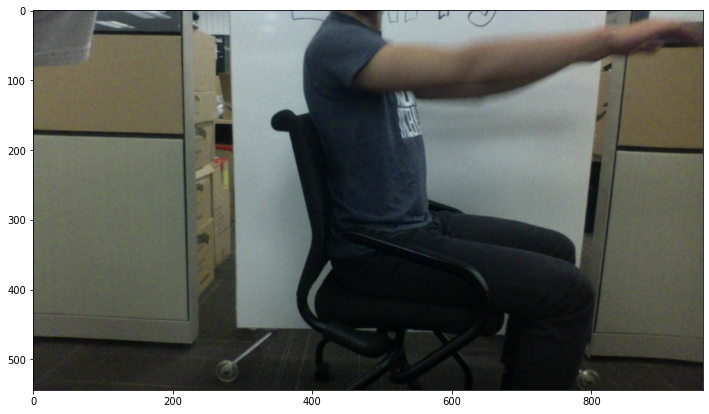

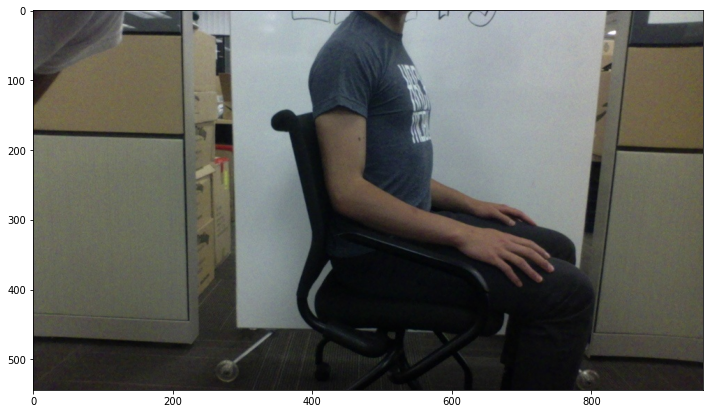

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/gdrive')

INPUT_SIZE = 800
"""
image_path = "./docs/kite.jpg"
image      = cv2.imread(image_path)
image      = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
"""
image_path = "/gdrive/MyDrive/PROJECT/DATA/5/good/2/110.jpg"
file_name1      = cv2.imread(image_path)#이미지 파일 경로
file_name1      = cv2.cvtColor(file_name1, cv2.COLOR_BGR2RGB)#입력 이미지,색상 변환 코드

image_path = "/gdrive/MyDrive/PROJECT/DATA/5/good/2/13.jpg"
file_name2      = cv2.imread(image_path)#이미지 파일 경로
file_name2      = cv2.cvtColor(file_name2, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,20))#이미지 영역의 확보이며 그려지지 않음
plt.imshow(file_name1)
plt.show()

plt.figure(figsize=(12,20))
plt.imshow(file_name2)
plt.show()

##탐지 실행

In [7]:
bboxes = model.predict(file_name2)#keras코드에서 boundary box로 bounding 됨

print(len(bboxes))#갯수
print(bboxes)#카테고리 인덱스

7
[array([376.26635742,   0.        , 799.72186279, 520.33294678,
         0.99062669,   0.        ]), array([  1.90509796,   0.58462483, 149.13815308, 186.41981506,
         0.18881603,   0.        ]), array([297.1729126 ,  57.28134537, 779.14990234, 525.65246582,
         0.90332288,  56.        ]), array([3.43962555e+02, 1.48671783e+02, 6.08192627e+02, 5.08839325e+02,
       2.23167926e-01, 5.60000000e+01]), array([3.83420685e+02, 2.98460144e+02, 6.65742920e+02, 5.37331848e+02,
       1.23852186e-01, 5.60000000e+01]), array([4.11942505e+02, 0.00000000e+00, 8.39316040e+02, 3.84682556e+02,
       1.72005117e-01, 7.20000000e+01]), array([0.00000000e+00, 0.00000000e+00, 2.75715240e+02, 4.95091583e+02,
       1.53824955e-01, 7.20000000e+01])]


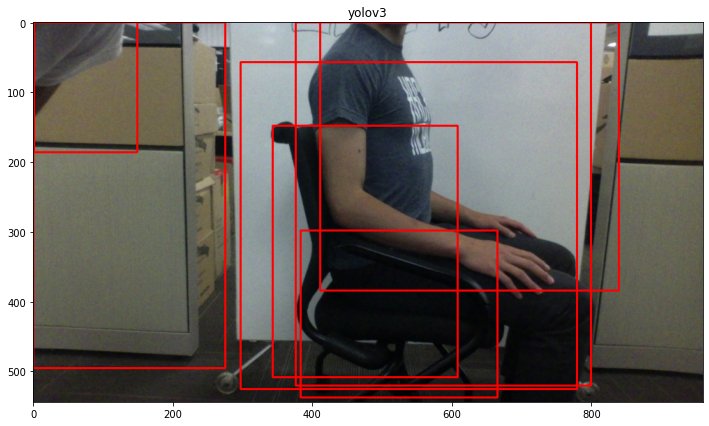

In [8]:
dummy = np.copy(file_name2)

for box in bboxes:
    
    x1, y1, x2, y2 = int(box[0]), int(box[1]), int(box[2]), int(box[3])
    conf = box[4]
    cls_id = int(box[5])
    dummy = cv2.rectangle(dummy, (x1,y1), (x2,y2), (255,0,0), 2)#빨간색, 선의 두께는 2
plt.figure(figsize=(12,20))#(그래프 가로, 세로)
plt.gca().set_title("yolov3") # get current figure 현재의 figure를 확인하기 위한 방법 /입력한 제목 추가 
#Axes반환한다(실제 이미지데이터의 역할)
plt.imshow(dummy)#원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림 
plt.show()

##hights scale value res

##박스 네이밍
사람 이미지만 나오도록 유도하기
##사람 이미지만 추출

In [9]:
import core
import colorsys
import random

def draw_bbox(file_name1, bboxes, show_label=True):
    """
    bboxes: [x_min, y_min, x_max, y_max, probability, cls_id] format coordinates.
    """
    Msc=[0]
    #classes : 딕셔너리 가능 항목 가져옴 num:str
    try:
        classes = class_names
    except NameError:
        classes = core.utils.read_class_names("./data/classes/coco.names")
    num_classes = len(classes)
    image_h, image_w, _ = file_name1.shape#이미지 크기

    hsv_tuples = [(1.0 * x / num_classes, 1., 1.) for x in range(num_classes)]
    colors = list(map(lambda x: colorsys.hsv_to_rgb(*x), hsv_tuples))
    colors = list(map(lambda x: (int(x[0] * 255), int(x[1] * 255), int(x[2] * 255)), colors))

    random.seed(0)
    random.shuffle(colors)
    random.seed(None)

    for i, bbox in enumerate(bboxes):#indexing(count, list v)
        coor = np.array(bbox[:4], dtype=np.int32)
        
        fontScale = 0.5
        score = bbox[4]
        Msc=np.append(Msc,score)
        class_ind = int(bbox[5])
     
        # if :
        #     bbox_mess = '%s: %.2f' % (classes[class_ind], score)
        #     t_size = cv2.getTextSize(bbox_mess, 0, fontScale, thickness=bbox_thick//2)[0]
        #     cv2.rectangle(image, c1, (c1[0] + t_size[0], c1[1] - t_size[1] - 3), bbox_color, -1)  # filled#labeling2

        #     cv2.putText(image, bbox_mess, (c1[0], c1[1]-2), cv2.FONT_HERSHEY_SIMPLEX,
        #                 fontScale, (0, 0, 0), bbox_thick//2, lineType=cv2.LINE_AA)#labeling2
        
        # if show_label :
        #     bbox_mess = '%s: %.2f' % (classes[class_ind], score)
        #     print("TESt")
        #     t_size = cv2.getTextSize(bbox_mess, 0, fontScale, thickness=bbox_thick//2)[0]
        #     cv2.rectangle(file_name1, c1, (c1[0] + t_size[0], c1[1] - t_size[1] - 3), bbox_color, -1)  # filled#labeling2
        #     cv2.putText(file_name1, bbox_mess, (c1[0], c1[1]-2), cv2.FONT_HERSHEY_SIMPLEX,fontScale, (0, 0, 0), bbox_thick//2, lineType=cv2.LINE_AA)#labeling2
        print("BOL",classes[class_ind])
        if classes[class_ind] in "person" :
          if score>=np.max(Msc):
            bbox_color = colors[class_ind]
            bbox_thick = int(0.6 * (image_h + image_w) / 600)
            c1, c2 = (coor[0], coor[1]), (coor[2], coor[3]) 
            cv2.rectangle(file_name1, c1, c2, bbox_color, bbox_thick)
            score=np.max(Msc)
            print('%s'%classes[class_ind],"SC",score)
            bbox_mess = '%s: %.2f' % (classes[class_ind], score)#출력되는 text
            t_size = cv2.getTextSize(bbox_mess, 0, fontScale, thickness=bbox_thick//2)[0]
            cv2.rectangle(file_name1, c1, (c1[0] + t_size[0], c1[1] - t_size[1] - 3), bbox_color, -1)  # filled#labeling2
            #이미지 파일,시작점(x,y),종료점(x,y)

            c1_1= (c1[0] + t_size[0], c1[1] - t_size[1] - 3)
            #이미지 추출은 y:y+h, x:x+w로 주어준다.

            ####PP=file_name1[c1[1]:c1_1[1],c1[0]:c1_1[0]]#+x값>,-y값(위 아래)<#y맞음
            #print("x/y",c1_1[1]-c1[1],"/",c1[0]-c1_1[0])#높이, 너비 -
            PP=file_name1[c1[1]:c2[1],c1[0]:c2[0]]
            cv2.imwrite("/gdrive/MyDrive/tmp/tester.jpg",PP)# 사람 부분만 이미지 추출
            ####print(c1[0],c1_1[0],"//",c1[1],c1_1[1])#376 476 // 0 -13
            
            cv2.putText(file_name1, bbox_mess, (c1[0], c1[1]-2), cv2.FONT_HERSHEY_SIMPLEX,fontScale, (0, 0, 0), bbox_thick//2, lineType=cv2.LINE_AA)#labeling2
    #print("Msc",Msc,"//",max(Msc)) #Msc [0.98066556 0.9436748  0.41189495 0.26212615] // 0.9806655645370483

    return file_name1

BOL person
person SC 0.9906266927719116
BOL person
BOL chair
BOL chair
BOL chair
BOL refrigerator
BOL refrigerator


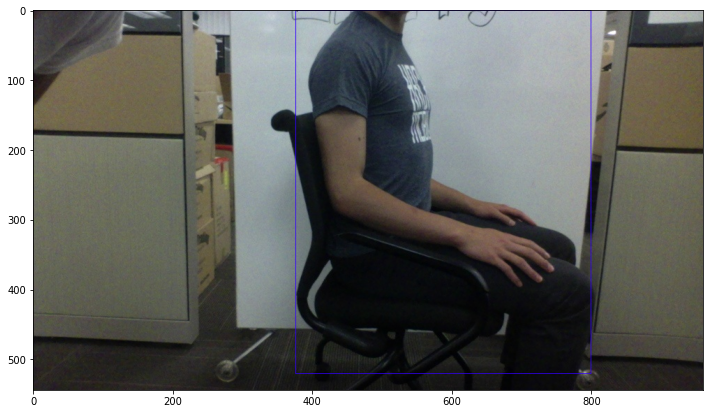

In [10]:
file_name1 = draw_bbox(file_name2, bboxes)
plt.figure(figsize=(12,20))#(x축의 길이,y축의길이)
plt.imshow(file_name1)
plt.show()

#Open Pose 사용 코드 템플릿
##이는 이미지 처리한 것을 이용해 본다.(콕표)

In [11]:
!git clone https://github.com/dhrim/Open-Pose-Keras


Cloning into 'Open-Pose-Keras'...
remote: Enumerating objects: 418, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 418 (delta 11), reused 21 (delta 11), pack-reused 397
Receiving objects: 100% (418/418), 29.70 MiB | 16.70 MiB/s, done.
Resolving deltas: 100% (236/236), done.


In [12]:
%cd Open-Pose-Keras
!pip install configobj

/content/darkeras-yolov4/Open-Pose-Keras
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for configobj: filename=configobj-5.0.6-py3-none-any.whl size=34547 sha256=d4bc87b5080287d3eaf91160edd0a2d7f01873ce134905c0901165894f518c74
  Stored in directory: /root/.cache/pip/wheels/0d/c4/19/13d74440f2a571841db6b6e0a273694327498884dafb9cf978
Successfully built configobj


### 데이터

In [13]:
!cp /gdrive/MyDrive/PROJECT/DATA/5/good/2/*.jpg ./

In [14]:
from IPython.display import Image, display


In [15]:
!pwd

/content/darkeras-yolov4/Open-Pose-Keras


##모델 로딩 / 포즈 추출 시행

In [16]:
from open_pose_wrapper import OpenPoseWrapper
model = OpenPoseWrapper()

Downloading...
From: https://drive.google.com/uc?id=1d9HGnnLhq6IhC5ZSVpBf7bSrpjNj5kPB
To: /content/darkeras-yolov4/Open-Pose-Keras/open_pose_model.h5
100%|██████████| 210M/210M [00:04<00:00, 49.8MB/s]


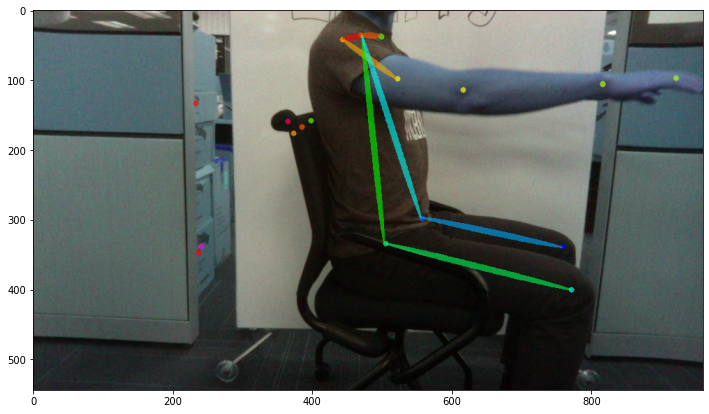

In [17]:
file_name1 = '44.jpg'
all_peaks1, subset1, candidate1 = model.extract(file_name1)
model.draw_result(file_name1,all_peaks1, subset1, candidate1, draw_dot=True, draw_line=True)

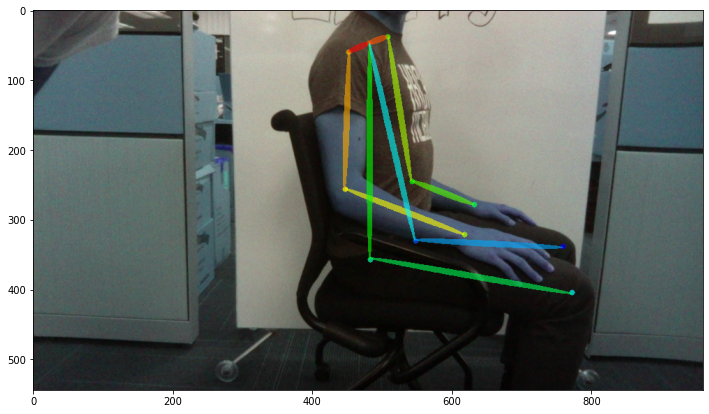

In [18]:
file_name2 = '23.jpg'
all_peaks2, subset2, candidate2 = model.extract(file_name2)
model.draw_result(file_name2,all_peaks2, subset2, candidate2, draw_dot=True, draw_line=True)

##추출 결과 / all_peak와 subset에 그 결과가 담긴다.
- all_peaks : 추출된 모든 포인트의 정보[18개]
- subset : 사람 별로 추출된 포인트의 정보[19개]

18개 부위를 추출한다.
각 부위의 이름은 config.py에 정의되어 있다.
```
part_str = [nose, neck, Rsho, Relb, Rwri, Lsho, Lelb, Lwri, Rhip, Rkne, Rank, Lhip, Lkne, Lank, Leye, Reye, Lear, Rear, pt19]
```

In [19]:
#about allpeak
import config_reader

_, model_params = config_reader.config_reader()
part_str = model_params['part_str']
for i in range(18):
  print(part_str[i], ": ", all_peaks1[i])#  x    y   score    point_id
  print(part_str[i], ": ", all_peaks2[i])#  x    y   score    point_id
all_peaks=[]
all_peaks.append(all_peaks1)
all_peaks.append(all_peaks2)

# print("\n",all_peaks1,"\n")
# print(all_peaks2,"\n")

print(all_peaks)
print(len(all_peaks))

# print(all_peaks[1])


[nose :  [(233, 133, 0.12181033586512058, 0), (237, 347, 0.1207269769447521, 1)]
[nose :  []
neck :  [(469, 36, 0.40046202018857, 2), (385, 167, 0.21817958002702653, 3)]
neck :  [(481, 47, 0.43039893731474876, 0)]
Rsho :  [(443, 42, 0.4406851716339588, 4), (373, 176, 0.1602645209129605, 5)]
Rsho :  [(452, 60, 0.40241948515176773, 1)]
Relb :  [(522, 98, 0.1063160409394186, 6), (816, 106, 0.1930632246658206, 7), (616, 114, 0.41728693642653525, 8)]
Relb :  [(447, 256, 0.5811582133173943, 2)]
Rwri :  [(921, 97, 0.14252737509377766, 9), (816, 105, 0.33550152328098193, 10)]
Rwri :  [(618, 321, 0.4953138753771782, 3)]
Lsho :  [(498, 37, 0.22916008345782757, 11), (499, 38, 0.22903409972786903, 12), (398, 158, 0.19160895133427402, 13)]
Lsho :  [(508, 38, 0.2724349405616522, 4)]
Lelb :  []
Lelb :  [(543, 245, 0.29018693696707487, 5)]
Lwri :  []
Lwri :  [(632, 278, 0.5645323060452938, 6)]
Rhip :  [(505, 334, 0.18912052584346384, 14)]
Rhip :  [(483, 357, 0.21908226842060685, 7)]
Rkne :  [(771, 400

https://vg-rlo.tistory.com/73

각 앵글의 값과 이에 대응하는 값을 처리함
/정수 : , 실수 : score

In [20]:
"""
file_name2 = '23.jpg'
all_peaks2, subset2, candidate2 = model.extract(file_name2)
"""
import numpy as np
import pandas as pd
#print(len(all_peaks))

def flatten(lst):
    frs=[]
    for j in range(2):#한번에 처리하기 위해 동시에 시행
      result= []
      print("jv",j)
      for i in range(18):
          item = [];rs=0
          if(len(all_peaks[j][i])==0):
            item.append(i)#지정이 안될 경우
            item.append(0)
            rs=float(i)
          else:
            rs=(i+all_peaks[j][i][0][2])#'%07.5f'%
          result.append(rs)
      print("R",result)
      frs.append(result)
    return frs

peaks=flatten(all_peaks)#2차원으로 데이터입력됨(정확도)
#peaks=np.array(peaks,dtype=float)
#np.set_printoptions(formatter={'float_kind': lambda x: "{0:0.5f}".format(x)})#formatting용
##print("peaks",peaks[1])
##print(len(peaks))

# fpeaks=[]
# for i in range(18):
#   ans=0.0
#   #실수 파싱
#   if peaks[i]>=0 and peaks[i]<1:
#     fpeaks.append(peaks[i])
#   else:
#     ans=peaks[i]-int(peaks[i])
#     fpeaks.append(ans)
# fpeaks=np.array(fpeaks,dtype=float)#float
# print(fpeaks)

jv 0
R [0.12181033586512058, 1.40046202018857, 2.440685171633959, 3.1063160409394186, 4.142527375093778, 5.229160083457828, 6.0, 7.0, 8.189120525843464, 9.362641661777161, 10.0, 11.243143039755523, 12.468356482684612, 13.0, 14.0, 15.132130153799153, 16.0, 17.15078898103576]
jv 1
R [0.0, 1.4303989373147488, 2.4024194851517677, 3.5811582133173943, 4.495313875377178, 5.272434940561652, 6.290186936967075, 7.564532306045294, 8.219082268420607, 9.34385857442976, 10.0, 11.15384611178888, 12.30101384036243, 13.0, 14.0, 15.0, 16.0, 17.0]


In [21]:
#about subset
##print(subset1)
#print("1/",subset[0])
#print("2/",len(subset[0]))#20
#print("3/",subset[0][0])

###각 포인트별 연결 가능 여부는 limSeq에 담겨 있다
'''
1: nose
2: neck
3: Rsho
4: Relb
5: Rwri
'''

In [22]:
# from open_pose_wrapper import limbSeq

# print(len(limbSeq))
# print(limbSeq)

print("peaks",peaks[0])
print("peaks2",peaks[1])

peaks [0.12181033586512058, 1.40046202018857, 2.440685171633959, 3.1063160409394186, 4.142527375093778, 5.229160083457828, 6.0, 7.0, 8.189120525843464, 9.362641661777161, 10.0, 11.243143039755523, 12.468356482684612, 13.0, 14.0, 15.132130153799153, 16.0, 17.15078898103576]
peaks2 [0.0, 1.4303989373147488, 2.4024194851517677, 3.5811582133173943, 4.495313875377178, 5.272434940561652, 6.290186936967075, 7.564532306045294, 8.219082268420607, 9.34385857442976, 10.0, 11.15384611178888, 12.30101384036243, 13.0, 14.0, 15.0, 16.0, 17.0]


#CallBack

Epoch 1/10
1/1 [==============================] - ETA: 0s - loss: nan
Epoch 1: loss did not improve from inf
1/1 [==============================] - 0s 412ms/step - loss: nan
Epoch 2/10
1/1 [==============================] - ETA: 0s - loss: nan
Epoch 2: loss did not improve from inf
1/1 [==============================] - 0s 16ms/step - loss: nan
Epoch 3/10
1/1 [==============================] - ETA: 0s - loss: nan
Epoch 3: loss did not improve from inf
1/1 [==============================] - 0s 14ms/step - loss: nan
Epoch 4/10
1/1 [==============================] - ETA: 0s - loss: nan
Epoch 4: loss did not improve from inf
1/1 [==============================] - 0s 15ms/step - loss: nan
Epoch 5/10
1/1 [==============================] - ETA: 0s - loss: nan
Epoch 5: loss did not improve from inf
1/1 [==============================] - 0s 14ms/step - loss: nan
Epoch 6/10
1/1 [==============================] - ETA: 0s - loss: nan
Epoch 6: loss did not improve from inf
1/1 [====================

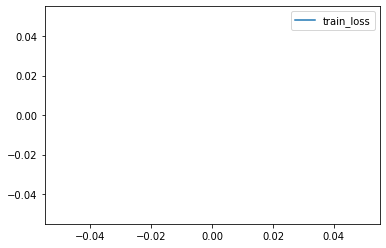

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers, Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import Callback,ModelCheckpoint

import time

model = Sequential([tf.keras.layers.Dense(1, input_shape=[1])])
model.add(Input(2))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(2, activation="softmax"))
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy')
"""
model_check_point = ModelCheckpoint(
    'best_model.h5', 
    monitor='val_loss', 
    verbose=1, 
    save_best_only=True)
history = model.fit(train_x, train_y, epochs=300, batch_size=128, verbose=0, validation_split=0.2,
                         callbacks=[model_check_point])
"""

model_check_point = ModelCheckpoint(
    'best_model.h5', 
    monitor='loss', 
    verbose=1, 
    save_best_only=True)

#history = model.fit(np.array([all_peaks[0][0][0],all_peaks[0][0][1]]),subset[0], epochs=10, batch_size=128, verbose=0,callbacks=[model_check_point])
history = model.fit(peaks[0],peaks[1], epochs=10, batch_size=18, verbose=1,callbacks=[model_check_point])
plt.plot(history.history['loss'], label='train_loss')
#plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()